In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.transforms

## John M. Shea
## February 11, 2020
## jshea@ece.ufl.edu
## @jmshea

# Visualizing Independence

This notebook is motivated by the (static) visualization of dijoint and statistically independent events here: 

[Disjointed Independence](https://blogs.adelaide.edu.au/maths-learning/2016/04/14/disjointed-independence/)

We begin by defining a function to create a visualization of events drawn from a sample space that can be shown as a $10 \times 10$ grid

We will color a square in the grid if it belongs to the event. Otherwise, we leave it white

The function can show up to 2 events, in which case it will use different colors for each event

Don't worry about the details of how this function works...

**Throughout this tutorial, we assume that all outcomes in the sample space are equally likely**

In [2]:
def gridshow(*args):
    '''
    visualize 1 or 2 events that have outcomes with uniform 
    probability in a 10x10 sample space
    
    inputs: 1 or 2 10x10 numpy arrays, each of which 
    has 1s for each outcome contained in the event and
    0s everywhere else
    
    outputs: draws events on grid, but no returned values
    '''
    
    if len(args)>2 or len(args)<1:
        print("gridshow only works for 1 or 2 arrays")
        return

    if np.shape(args[0]) != (10,10):
        print("data must be in 10x10 numpy arrays")
        return
    data=np.ones((10,10))-0.4*args[0]

    if len(args)>1:
        if np.shape(args[0]) != (10,10):
            print("data must be in 10x10 numpy arrays")
            return
        data2=np.ones((10,10))-args[1]
    def extents(f):
      delta = f[1] - f[0]
      return [f[0] - delta/2, f[-1] + delta/2]

    x = np.linspace(0, 9, 10)
    y = np.linspace(0, 9, 10)
#     data=np.ones((10,10))
#     data[0:5,0:5]=0.6

#     data2=np.ones((10,10))
#     data2[3:6,3:8]=0



    plt.imshow(data, aspect='auto', interpolation='none',
               extent=extents(x) + extents(y), origin='lower',
               cmap='ocean',vmin=0, vmax=1,alpha=0.8)
    if len(args)>1:
        plt.imshow(data2, aspect='auto', interpolation='none',
                   extent=extents(x) + extents(y), origin='lower',
                   cmap='ocean',vmin=0, vmax=1,alpha=0.6)
    fig=plt.gcf()
    fig.set_size_inches(5,5)
    ax=plt.gca()
    ax.set_xticks(np.linspace(0.5,9.5,10))
    ax.set_yticks(np.linspace(0.5,9.5,10))
    # Turn off tick labels
    ax.set_yticklabels(np.linspace(1,10,10,dtype="int"))
    ax.set_xticklabels(np.linspace(1,10,10,dtype="int"))

    # Create offset transform by 5 points in x direction
    dx = -16/72.; dy = 0/72. 
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    # apply offset transform to all x ticklabels.
    for label in ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)

    # Create offset transform by 5 points in y direction
    dx = 0/72.; dy = -16/72. 
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    # apply offset transform to all x ticklabels.
    for label in ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)

    plt.grid()

## Preliminaries: Single Events

We begin by visualizing some single events and commenting on them to help understand how we can work with this visualization.

I want to use 1-based indexing throughout this tutorial, and only rectangular events, so I am going to create a helper function to 
make it easier to create such events:

In [3]:
def rectevent(w,h,x=1,y=1):
    '''Create as rectangular event of height h and width w,
    starting at position x,y'''
    data=np.zeros((10,10))
    
    # Sanity checking
    if w<0 or h<0 or w>10 or h>10 or x<1 or y<1 or x>10 or y>10:
        print("All input arguments take arguments from 1,2,...,10")
        return
    if y+h>11 or x+w>11:
        print("You provided a x,y starting point that would cause",
             "the rectangle to be off the grid")
        return

    data[y-1:y-1+h,x-1:x-1+w]=1
    return data

Now, let's draw an event $E$ that occupies a $4 \times 3$ area of the grid:

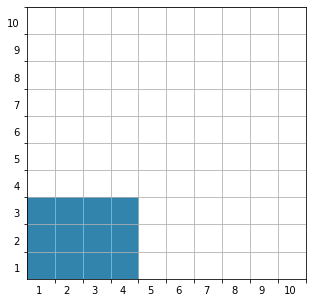

In [4]:
E=rectevent(4,3)
np.shape(E)
gridshow(E)

Because we have assumed equally likely outcomes, the probability of an event $E$ is 
$$
P(E) = \frac{\vert E \vert}{\vert S \vert}
$$

Since we assign a 1 to our numpy.array representation of the event for every outcome that is included in the event, and 0 otherwise, we can easily write a function to calculate the probability of an event from its array representation:

In [5]:
def prob(E):
    
    return np.sum(E)/np.size(E)

Then the probability of $E$ is 

In [6]:
prob(E)

0.12

Note that the probability of the event is not affected by it location in the grid:

0.12

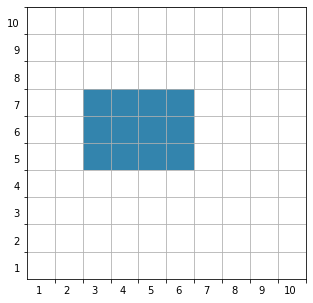

In [7]:
E2=rectevent(4,3,3,5)
np.shape(E2)
gridshow(E2)
prob(E2)

## Mutually Exclusive Events

Before we get to independence, let's start with an easier concept: mutually exclusive (or disjoint) events

Events are mutually exclusive if they share no common outcomes

In terms of our visualization, events are mutually exclusive if the plotted rectangles do not overlap.

Here are examples of 2 events that are mutually exclusive:

(0.12, 0.16)

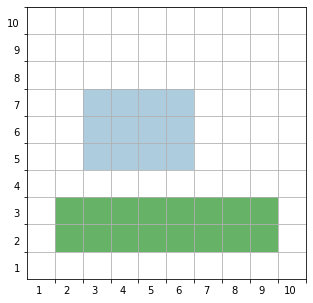

In [8]:
E3=rectevent(4,3,3,5)
E4=rectevent(8,2,2,2)
gridshow(E3,E4)
prob(E3),prob(E4)

(0.25, 0.24)

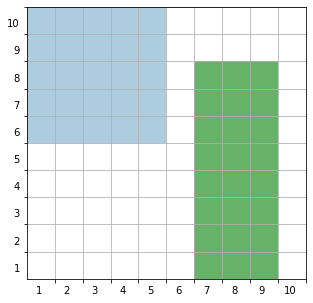

In [9]:
E5=rectevent(5,5,1,6)
E6=rectevent(3,8,7,1)
gridshow(E5,E6)
prob(E5), prob(E6)

For events that are mutually exclusive, the intersection of the two events will be the all-zero array, and the probability of the intersection will be zero

Since the array contain 1s and 0s, logical and can be performed by performing elementwise multiplication of the arrays:

0.0

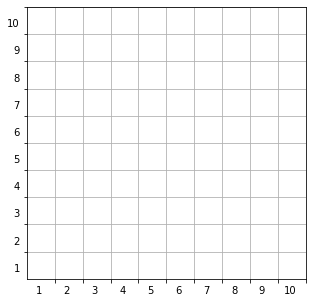

In [10]:
int34=E3*E4
gridshow(int34)
prob(int34)

0.0

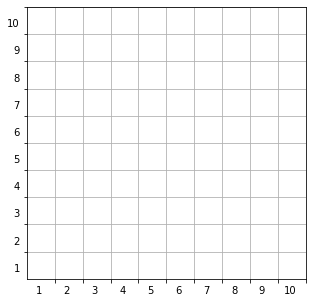

In [11]:
int56=E5*E6
gridshow(int56)
prob(int56)

On the other hand, here are examples of arrays that are **not mutually exclusive**. The probabilities of the individual arrays is not changed, just the particular sets of outcomes in the arrays:

(0.12, 0.16)

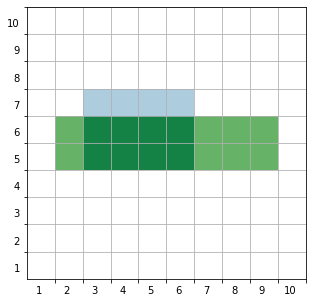

In [12]:
G3=rectevent(4,3,3,5)
G4=rectevent(8,2,2,5)
gridshow(G3,G4)
prob(G3),prob(G4)

The intersections are not the null set and thus have non-zero probability:

0.08

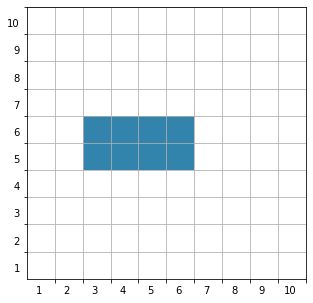

In [13]:
intg34=G3*G4
gridshow(intg34)
prob(intg34)

(0.25, 0.24)

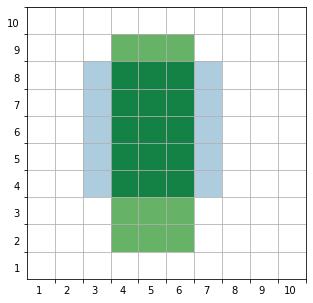

In [14]:
G5=rectevent(5,5,3,4)
G6=rectevent(3,8,4,2)
gridshow(G5,G6)
prob(G5), prob(G6)

0.15

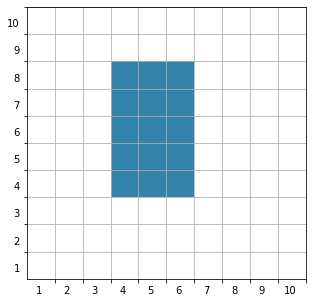

In [15]:
intg56=G5*G6
gridshow(intg56)
prob(intg56)

## Statistical Independence

Finally, we are ready to study statistical independence. We begin with an example:

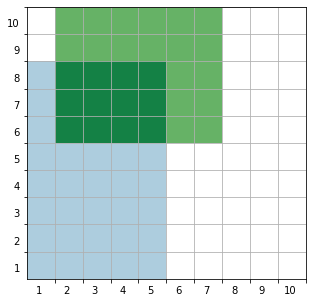

In [16]:
I1=rectevent(5,8)
I2=rectevent(6,5,2,6)
gridshow(I1,I2)

These events are statistically independent.

How can we tell? 

First consider their probabilities:

In [17]:
prob(I1),prob(I2)

(0.4, 0.3)

Now, note that we can determine the conditional probability of $I_1$ given $I_2$ by counting the proportion of squares of $I_1$ that lie within $I_2$

The number of square of $I_1$ that lie within $I_2$ is the size of the intersection of $I_1$ and $I_2$, which is the darkest shaded area. 

We see there are 12 such squares.

The total number of squares of $I_2$ is 30, so the conditional probability of $I_1$ given $I_2$ is

$$
P\left( I_1 \vert I_2 \right) = \frac{12}{30} = 0.4
$$

Since $P(I_1|I_2) = P(I_1)=0.4$, $I_1$ is independent of $I_2$

Note that we could have gotten the same result using the definition of conditional probability:

$$
P(I_1|I_2) = \frac{P(I_1 \cap I_2)}{P(I_2)}
$$

We can get the probability of the intersection as before:

In [18]:
inti12=I1*I2
prob(inti12)

0.12

Then the conditional probability of $I_1$ given $I_2$ is:

In [19]:
prob(inti12)/prob(I2)

0.4

The results work the same for the opposite conditioning. The conditional probability of $I_2$ given $I_1$ is
$$
P(I_2|I_1) = \frac{P(I_1 \cap I_2)}{P(I_1)}
$$

In [20]:
prob(inti12)/prob(I1)

0.3

Now, what property will ensure that this happens?

Recall our definition for statistical independence: Two events $A$ and $B$ are statistically independent if 
$$
P(A \cap B) =P(A)P(B)
$$

If this condition is achieved, then the events will be statistically independent. 

Below is an interactive widget that lets you try every possible position for the two rectangles. Experiment with this widget to find different combinations of positions that achieve indepence for these two events:

In [21]:
from ipywidgets import interactive

In [22]:
def f(x1,y1,x2,y2):
    A=rectevent(5,8,x1,y1)
    B=rectevent(6,5,x2,y2)
    gridshow(A,B)
    intab=A*B
    if round(prob(intab),4)==round(prob(A)*prob(B),4):
        plt.title("Independent!")
    else:
        plt.title("$~$")
    plt.show()

interactive_plot=interactive(f,x1=(1,6),y1=(1,3),x2=(1,5),y2=(1,6))
interactive_plot

interactive(children=(IntSlider(value=3, description='x1', max=6, min=1), IntSlider(value=2, description='y1',…

Using this knowledge, change the starting $x,y$ locations for the following events until they are statistically independent. Check the proportion of outcomes of each event within the other event and make sure it is the same as the original probability of the event:

(0.8, 0.3)

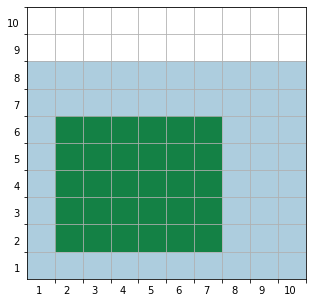

In [23]:
I3=rectevent(10,8)
I4=rectevent(6,5,2,2)
gridshow(I3,I4)
prob(I3), prob(I4)

Repeat for this set of events:

(0.2, 0.4)

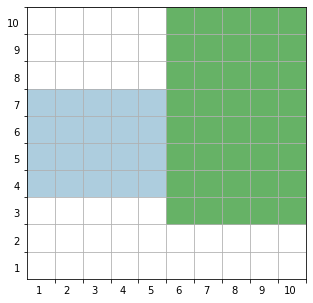

In [24]:
I5=rectevent(5,4,1,4)
I6=rectevent(5,8,6,3)
gridshow(I5,I6)
prob(I5), prob(I6)

**To Think About:** Considering the experiments we conducted above, do most cases lead to independent events or to events that are not independent?